# **Evaluación de un modelo de clasificación**

Sofía Ingigerth Cañas Urbina A01173828

# Actividad de la semana pasada

**Librerías**

Importamos la librería de pandas para poder manipular y analizar el data frame con la información. De la de sklearn obtenemos paquetes de algoritmos de entrenamiento y evaluación de estos algoritmos

In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix

from sklearn import tree 
from sklearn import neighbors 
from sklearn.neighbors import KNeighborsClassifier

# Librerías para la nueva actividad
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, roc_auc_score, roc_curve

**Importación y exploración de datos**

Importamos los datos y los guardamos en un data frame, imprimimos sus dimensiones y las primeras observaciones para familiarizarnos

In [4]:
mushroom = pd.read_csv('mushrooms.csv')

print(mushroom.shape)
mushroom.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Vemos que las variables son mayoritariamente de tipo categórico, no son numéricas

In [5]:
mushroom.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

**Preprocesamiento de los datos**

Dividimos en atributos o características y etiquetas o variable a predecir

In [6]:
X = mushroom.copy()
X = mushroom.drop('class', axis = 1)
Y = mushroom['class']

Las características son de tipo categórico, entonces una alternativa es usar "dummy variables" para poder usar el algoritmo de clasificación. 

In [7]:
X = pd.get_dummies(X) 
Y = pd.get_dummies(Y)
del Y['p']
Y = Y.e

Dividimos los datos en training y testing set, en proporción 80:20

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

**Support Vector Machine**

*Entrenamiento*

Se probaron diferentes kernels para el SVM (poly, rbf, sigmoid) y en general mostraban muy buenos resultados con una alta precisión. También se experimento estandarizando y no estandarizando, al final sólo se muestra una alternativa, considerando alguna de las mejores

In [9]:
classifierSVC = make_pipeline(StandardScaler(), SVC(kernel = 'rbf', probability=True)).fit(X_train, Y_train)

*Evaluación del algoritmo*

In [10]:
Y_predS = classifierSVC.predict(X_test)

print(confusion_matrix(Y_test, Y_predS))
print(classification_report(Y_test, Y_predS))

[[766   1]
 [  0 858]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       767
           1       1.00      1.00      1.00       858

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



**Árbol de decisión**

*Entrenamiento*

In [11]:
classifierTree = tree.DecisionTreeClassifier() 
classifierTree = classifierTree.fit(X_train, Y_train)

*Evaluación del algoritmo*

In [12]:
Y_predA = classifierTree.predict(X_test)

print(confusion_matrix(Y_test, Y_predA))
print(classification_report(Y_test, Y_predA))

[[767   0]
 [  0 858]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       767
           1       1.00      1.00      1.00       858

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



**KNeighbors**

*Entrenamiento*

In [13]:
classifierKN = neighbors.KNeighborsClassifier() 
classifierKN = classifierKN.fit(X_train, Y_train)

*Evaluación del algoritmo*

In [14]:
Y_predK = classifierKN.predict(X_test)

print(confusion_matrix(Y_test, Y_predK))
print(classification_report(Y_test, Y_predK))

[[767   0]
 [  0 858]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       767
           1       1.00      1.00      1.00       858

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Evaluación de Support Vector Machine

**Matriz de confusión**

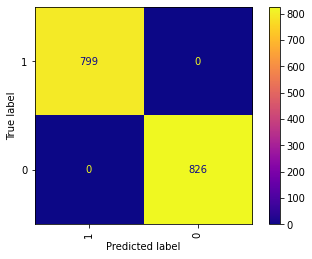

In [ ]:
cmS = metrics.confusion_matrix (Y_test, Y_predS, labels=Y.value_counts().keys())
pS = metrics.ConfusionMatrixDisplay(cmS,display_labels=Y.value_counts().keys()) 

pS.plot(xticks_rotation='vertical', cmap='plasma')

plt.show()

**Sensibilidad y especificidad**

In [ ]:
sensS = cmS[0][0]/(cmS[0][0]+cmS[0][1])
print('La sensibilidad de SVM es: ', sensS)

espS = cmS[1][1]/(cmS[1][1]+cmS[1][0])
print('La especificidad de SVM es: ', espS)

La sensibilidad de SVM es:  1.0
La especificidad de SVM es:  1.0


**Curva ROC y AUC**

In [ ]:
Y_pred_probS = classifierSVC.predict_proba(X_test)[:,1]
AUCS = roc_auc_score(Y_test, Y_pred_probS)
print('La AUC de Support Vector Machine es: ', AUCS)

La AUC de Support Vector Machine es:  1.0


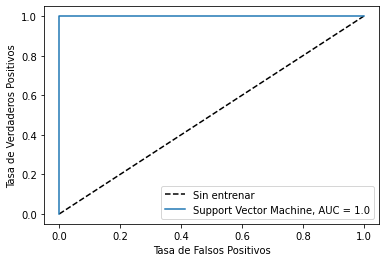

In [ ]:
fpr, tpr, _ = roc_curve(Y_test, Y_pred_probS)
plt.plot([0, 1], [0, 1], 'k--',label='Sin entrenar')
plt.plot(fpr, tpr,'-',label='Support Vector Machine, AUC = ' + str(AUCS))
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc=4)
plt.show()

# Evaluación de Árbol de decisión

**Matriz de confusión**

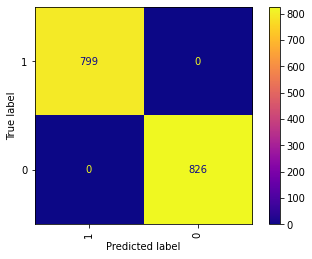

In [ ]:
cmA = metrics.confusion_matrix (Y_test, Y_predA, labels=Y.value_counts().keys())
pA = metrics.ConfusionMatrixDisplay(cmA,display_labels=Y.value_counts().keys()) 

pA.plot(xticks_rotation='vertical', cmap='plasma')

plt.show()

**Sensibilidad y especificidad**

In [ ]:
sensA = cmA[0][0]/(cmA[0][0]+cmA[0][1])
print('La sensibilidad del árbol de decisión es: ', sensA)

espA = cmA[1][1]/(cmA[1][1]+cmA[1][0])
print('La especificidad del árbol de decisión es: ', espA)

La sensibilidad del árbol de decisión es:  1.0
La especificidad del árbol de decisión es:  1.0


**Curva ROC y AUC**

In [ ]:
Y_pred_probA = classifierTree.predict_proba(X_test)[:,1]
AUCA = roc_auc_score(Y_test, Y_pred_probA)
print('La AUC del árbol de decisión es: ', AUCA)

La AUC del árbol de decisión es:  1.0


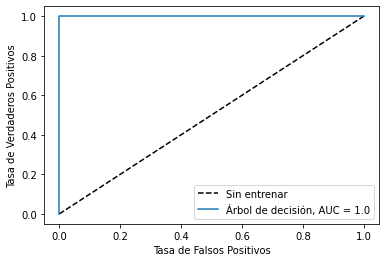

In [ ]:
fpr, tpr, _ = roc_curve(Y_test, Y_pred_probA)
plt.plot([0, 1], [0, 1], 'k--',label='Sin entrenar')
plt.plot(fpr, tpr,'-',label='Árbol de decisión, AUC = ' + str(AUCA))
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc=4)
plt.show()

#Conclusiones

En esta actividad se desarrollan nuevos modelos de evaluación para los modelos de clasificación realizados con anterioridad.

Como ya se había visto, la precisión de los tres algoritmos de clasificación utilizados: SVM, árboles y KN sea tan alta, prácticamente es de 1. Algunas variables predictoras podrían estar sobrando y se podría realizar una selección de variables.

La perfección de los modelos se refleja en una matrices de confusión con ceros para las esquinas de falsos positivos y falsos negativos, sensibilidad, especificidad y AUC de 1, además de curva ROC completamente a la izquierda.